<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_Finan%C3%A7as_An%C3%A1lises_Previs%C3%A3o_SeriesTemporais_ARIMA_FacebokProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ARIMA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime 
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [3]:
dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('/content/acoes.csv', parse_dates=['Date'], index_col='Date', date_parser = dateparse, usecols=['Date','BOVA'])

In [4]:
data.head()

,BOVA
Date,
2015-01-02,47.259998
2015-01-05,46.320000
2015-01-06,46.580002
2015-01-07,48.150002
2015-01-08,48.509998


In [5]:
serie_temporal = data['BOVA']
serie_temporal

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
                ...    
2020-10-27    95.800003
2020-10-28    92.430000
2020-10-29    92.910004
2020-10-30    90.660004
2020-11-03    92.410004
Name: BOVA, Length: 1446, dtype: float64

In [6]:
serie_temporal[0] , serie_temporal[1]

(47.2599983215332, 46.31999969482422)

In [7]:
serie_temporal['2015-01-08']

48.5099983215332

In [8]:
serie_temporal['2015-01-01':'2015-01-31'] #intervalos

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
2015-01-09    47.529999
2015-01-12    46.830002
2015-01-13    46.639999
2015-01-14    46.480000
2015-01-15    47.000000
2015-01-16    47.599998
2015-01-19    46.310001
2015-01-20    46.520000
2015-01-21    47.810001
2015-01-22    48.119999
2015-01-23    47.299999
2015-01-26    47.189999
2015-01-27    47.340000
2015-01-28    46.330002
2015-01-29    46.380001
2015-01-30    45.610001
Name: BOVA, dtype: float64

In [9]:
serie_temporal['2016']

Date
2016-01-04    41.099998
2016-01-05    41.180000
2016-01-06    40.500000
2016-01-07    39.470001
2016-01-08    39.340000
                ...    
2016-12-23    56.360001
2016-12-26    56.959999
2016-12-27    56.810001
2016-12-28    57.840000
2016-12-29    58.240002
Name: BOVA, Length: 249, dtype: float64

In [10]:
serie_temporal.index.max() #index pq colocamos a data como index no começo

Timestamp('2020-11-03 00:00:00')

In [11]:
serie_temporal.index.min()

Timestamp('2015-01-02 00:00:00')

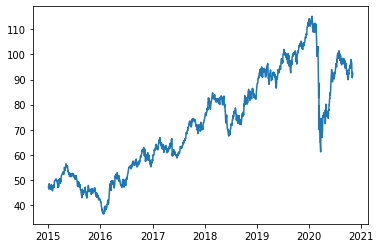

In [12]:
plt.plot(serie_temporal);

In [13]:
figura = px.line(title='Historico dos preços das ações')
figura.add_scatter( x = serie_temporal.index, y = serie_temporal)

In [14]:
serie_temporal_datas = serie_temporal['2015-01-01':'2015-12-31']

In [15]:
serie_temporal_datas

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
                ...    
2015-12-22    42.230000
2015-12-23    42.750000
2015-12-28    42.500000
2015-12-29    42.419998
2015-12-30    42.130001
Name: BOVA, Length: 246, dtype: float64

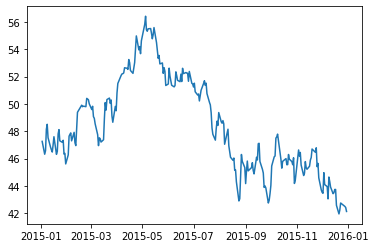

In [16]:
plt.plot(serie_temporal_datas);

- decomposição

In [18]:
len(serie_temporal) / 2

723.0

In [17]:
decomposição = seasonal_decompose(serie_temporal, period=723)

In [19]:
tendencia = decomposição.trend
sazonal = decomposição.seasonal
aleatorio = decomposição.resid

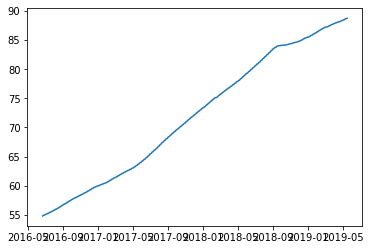

In [20]:
plt.plot(tendencia);

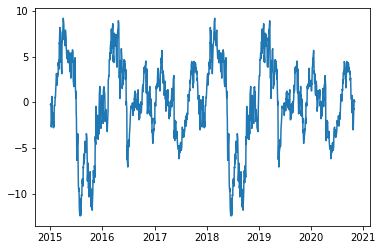

In [21]:
plt.plot(sazonal); #comum em vendas

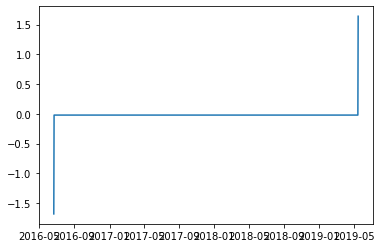

In [22]:
plt.plot(aleatorio);

- Previsão

In [23]:
modelo = auto_arima(serie_temporal, suppress_warnings=True, error_action='ignore')

In [24]:
modelo.order

(4, 1, 4)

In [25]:
previsoes = modelo.predict(n_periods=90) #prev de 90 dias

In [26]:
previsoes

array([92.06040543, 91.65955205, 91.68701293, 90.8491663 , 91.06300945,
       90.26532904, 90.40839673, 90.00106925, 89.93690554, 89.99878804,
       89.77377018, 90.13962912, 89.91466341, 90.32026045, 90.24460551,
       90.48548541, 90.60221361, 90.61966236, 90.85324312, 90.72101018,
       90.93812553, 90.78325798, 90.87703034, 90.79503927, 90.73961426,
       90.75153715, 90.60180531, 90.66525576, 90.51268025, 90.56590554,
       90.48364523, 90.48864938, 90.49802807, 90.45815386, 90.52985907,
       90.47808018, 90.55958851, 90.53156239, 90.5800275 , 90.5913893 ,
       90.59314894, 90.63349803, 90.60310728, 90.64661688, 90.61112656,
       90.63411095, 90.61489301, 90.60877602, 90.61143082, 90.58467932,
       90.60044369, 90.57066356, 90.5855091 , 90.56816856, 90.57246937,
       90.57318666, 90.56632199, 90.58015079, 90.56868461, 90.5852095 ,
       90.57727698, 90.58741866, 90.58747874, 90.58792703, 90.59484053,
       90.58829248, 90.59708758, 90.58919513, 90.59468672, 90.59

In [29]:


len(serie_temporal)

1446

In [28]:
treinamento = serie_temporal[:1081]

In [30]:
treinamento.shape

(1081,)

In [33]:
treinamento.index.min(), treinamento.index.max()

(Timestamp('2015-01-02 00:00:00'), Timestamp('2019-05-10 00:00:00'))

In [34]:
teste = serie_temporal[1081:]

In [35]:
teste.shape

(365,)

In [36]:
teste.index.min(), teste.index.max()

(Timestamp('2019-05-13 00:00:00'), Timestamp('2020-11-03 00:00:00'))

In [38]:
modelo2 = auto_arima(treinamento, suppress_warnings=True, error_action='ignore')

In [39]:
teste.index #valores reais

DatetimeIndex(['2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16',
               '2019-05-17', '2019-05-20', '2019-05-21', '2019-05-22',
               '2019-05-23', '2019-05-24',
               ...
               '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-11-03'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [44]:
previsões = pd.DataFrame(modelo2.predict(n_periods=365), index=teste.index)
previsões.columns = ['Previsoes']

In [45]:
previsões

,Previsoes
Date,
2019-05-13,90.900022
2019-05-14,90.977381
2019-05-15,91.040707
2019-05-16,91.095342
2019-05-17,91.144594
...,...
2020-10-27,105.575508
2020-10-28,105.616004
2020-10-29,105.656500


In [47]:
teste #real

Date
2019-05-13    88.309998
2019-05-14    88.760002
2019-05-15    87.870003
2019-05-16    86.559998
2019-05-17    86.739998
                ...    
2020-10-27    95.800003
2020-10-28    92.430000
2020-10-29    92.910004
2020-10-30    90.660004
2020-11-03    92.410004
Name: BOVA, Length: 365, dtype: float64

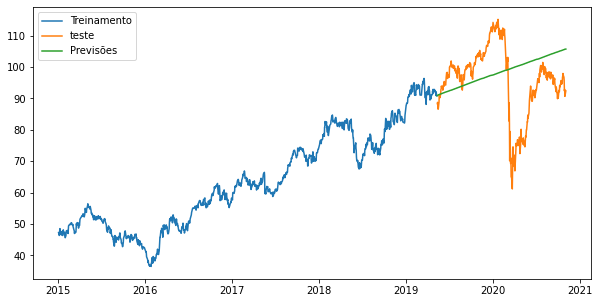

In [50]:
plt.figure(figsize=(10,5))
plt.plot(treinamento, label='Treinamento')
plt.plot(teste, label='teste')
plt.plot(previsões, label='Previsões')
plt.legend();

a previsão não foi capaz de prever o inicio da pandemia, por isso o algoritimo teve trabalho ao acertar as previsões depois de março de 2020

e ainda o ARIMA não é tão indicado para trabalhar com dados financeiros, e sim por exemplo com vendas em um periodo especifico

- avaliação

In [51]:
teste[0:2]

Date
2019-05-13    88.309998
2019-05-14    88.760002
Name: BOVA, dtype: float64

In [52]:
previsões[0:2]

,Previsoes
Date,
2019-05-13,90.900022
2019-05-14,90.977381


In [59]:
sum(abs(teste - previsões['Previsoes'])/ len(teste)) #qnto menor esse valor, melhor

10.260835830334681

ou

In [60]:
from sklearn.metrics import mean_absolute_error

In [61]:
mean_absolute_error(teste, previsões)

10.260835830334681

isso indica que fazendo a previsao com esse algortimo, podemos errar em torno de 10 reais, tanto para cima, como para baixo

**Facebook Prophet**

In [62]:
pip install fbprophet

In [63]:
from fbprophet import Prophet

In [66]:
base = pd.read_csv('/content/acoes.csv', usecols=['Date', 'BOVA']) #aqui naoé prreciso usar o parse, poiso facebook prophet va fazer o serviço

In [67]:
base

,Date,BOVA
0,2015-01-02,47.259998
1,2015-01-05,46.320000
2,2015-01-06,46.580002
3,2015-01-07,48.150002
4,2015-01-08,48.509998
...,...,...
1441,2020-10-27,95.800003
1442,2020-10-28,92.430000
1443,2020-10-29,92.910004
1444,2020-10-30,90.660004


vamos renomear as colunas por boas prticas e nao haver erros no facebbok prophet, date vai ser ds e BOVA vai ser y

In [69]:
base = base[['Date', 'BOVA']].rename(columns= {'Date': 'ds', 'BOVA':'y'})

In [70]:
base

,ds,y
0,2015-01-02,47.259998
1,2015-01-05,46.320000
2,2015-01-06,46.580002
3,2015-01-07,48.150002
4,2015-01-08,48.509998
...,...,...
1441,2020-10-27,95.800003
1442,2020-10-28,92.430000
1443,2020-10-29,92.910004
1444,2020-10-30,90.660004


- Modelo e Previsão

In [71]:
modelo = Prophet()
modelo.fit(base)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
futuro = modelo.make_future_dataframe(periods=90) #previsao pra os proximos 90 dias
predictions = modelo.predict(futuro)

In [75]:
predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,48.991425,43.851878,58.041350,48.991425,48.991425,1.835024,1.835024,1.835024,0.401428,0.401428,0.401428,1.433596,1.433596,1.433596,0.0,0.0,0.0,50.826449
1,2015-01-05,49.018699,44.000554,58.641342,49.018699,49.018699,2.198627,2.198627,2.198627,0.342181,0.342181,0.342181,1.856447,1.856447,1.856447,0.0,0.0,0.0,51.217327
2,2015-01-06,49.027791,44.037633,57.986283,49.027791,49.027791,2.386577,2.386577,2.386577,0.389818,0.389818,0.389818,1.996759,1.996759,1.996759,0.0,0.0,0.0,51.414368
3,2015-01-07,49.036883,44.747627,58.694020,49.036883,49.036883,2.492839,2.492839,2.492839,0.359332,0.359332,0.359332,2.133507,2.133507,2.133507,0.0,0.0,0.0,51.529722
4,2015-01-08,49.045974,44.743777,58.493594,49.045974,49.045974,2.661502,2.661502,2.661502,0.396597,0.396597,0.396597,2.264905,2.264905,2.264905,0.0,0.0,0.0,51.707476


In [77]:
len(base), len(predictions)

(1446, 1536)

In [78]:
len(predictions) - len(base)

90

In [80]:
predictions.tail(90)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1446,2020-11-04,90.226469,85.399452,99.700532,90.226469,90.226469,2.341880,2.341880,2.341880,0.359332,0.359332,0.359332,1.982549,1.982549,1.982549,0.0,0.0,0.0,92.568350
1447,2020-11-05,90.204724,85.376106,98.846509,90.204724,90.204724,2.245200,2.245200,2.245200,0.396597,0.396597,0.396597,1.848603,1.848603,1.848603,0.0,0.0,0.0,92.449925
1448,2020-11-06,90.182980,84.667010,99.714794,90.182980,90.182980,2.119374,2.119374,2.119374,0.401428,0.401428,0.401428,1.717946,1.717946,1.717946,0.0,0.0,0.0,92.302354
1449,2020-11-07,90.161235,83.589227,98.153646,90.161235,90.161235,0.648184,0.648184,0.648184,-0.944678,-0.944678,-0.944678,1.592862,1.592862,1.592862,0.0,0.0,0.0,90.809419
1450,2020-11-08,90.139490,83.934843,97.934955,90.139490,90.139490,0.530774,0.530774,0.530774,-0.944678,-0.944678,-0.944678,1.475452,1.475452,1.475452,0.0,0.0,0.0,90.670264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,2021-01-28,88.378164,84.496086,98.456907,87.575888,88.989403,3.402828,3.402828,3.402828,0.396597,0.396597,0.396597,3.006231,3.006231,3.006231,0.0,0.0,0.0,91.780992
1532,2021-01-29,88.356420,84.575725,98.687078,87.549387,88.992725,3.408446,3.408446,3.408446,0.401428,0.401428,0.401428,3.007017,3.007017,3.007017,0.0,0.0,0.0,91.764865
1533,2021-01-30,88.334675,83.446658,97.438861,87.517648,88.987238,2.069184,2.069184,2.069184,-0.944678,-0.944678,-0.944678,3.013862,3.013862,3.013862,0.0,0.0,0.0,90.403858
1534,2021-01-31,88.312930,83.331240,98.019873,87.483969,88.983857,2.082822,2.082822,2.082822,-0.944678,-0.944678,-0.944678,3.027501,3.027501,3.027501,0.0,0.0,0.0,90.395753


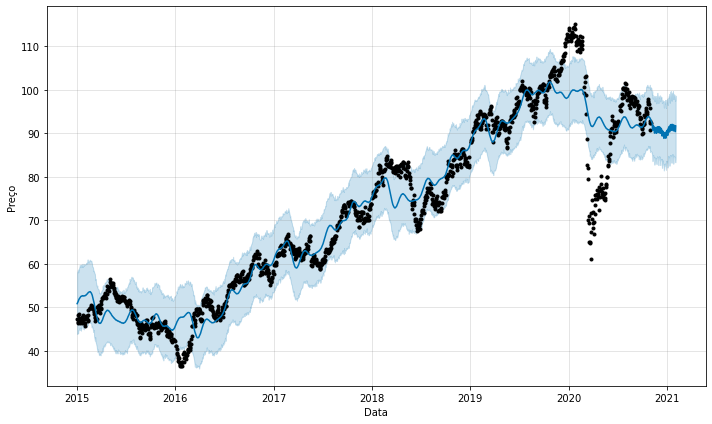

In [82]:
modelo.plot(predictions, xlabel='Data', ylabel='Preço');

o modelo apenas mostra dificuldade no inicio da pandemia, muito normal;azul escuro é os preços das previsoes poros proximos 90 dias

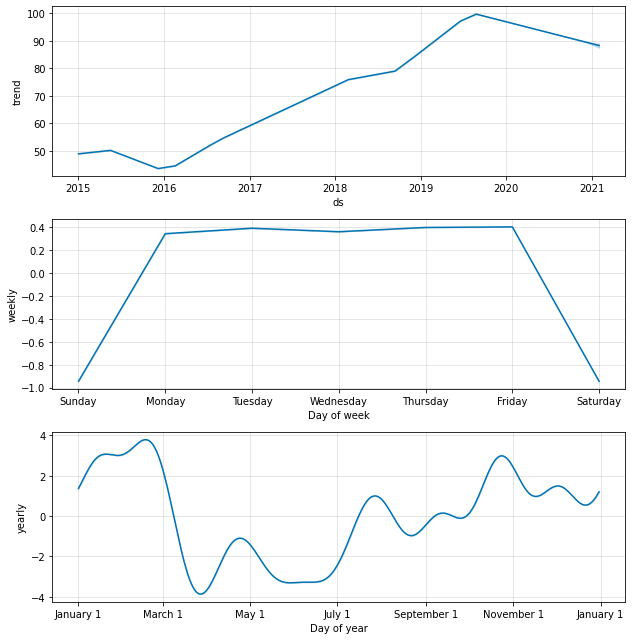

In [83]:
modelo.plot_components(predictions); #1 tendencia  #2 bolsa de valores nao tem sab e dom 

- Avaliação

In [84]:
teste.shape

(365,)

In [85]:
teste.tail()

Date
2020-10-27    95.800003
2020-10-28    92.430000
2020-10-29    92.910004
2020-10-30    90.660004
2020-11-03    92.410004
Name: BOVA, dtype: float64

In [87]:
pred = modelo.make_future_dataframe(periods=0)#aqui so queremos a previsao da base que ja existe
previsao = modelo.predict(pred)

In [88]:
previsao.shape

(1446, 19)

In [89]:
previsao.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1441,2020-10-27,90.400427,87.223975,100.804759,90.400427,90.400427,3.266904,3.266904,3.266904,0.389818,0.389818,0.389818,2.877086,2.877086,2.877086,0.0,0.0,0.0,93.667331
1442,2020-10-28,90.378683,86.200737,101.055057,90.378683,90.378683,3.163925,3.163925,3.163925,0.359332,0.359332,0.359332,2.804593,2.804593,2.804593,0.0,0.0,0.0,93.542607
1443,2020-10-29,90.356938,86.787503,100.434854,90.356938,90.356938,3.113158,3.113158,3.113158,0.396597,0.396597,0.396597,2.716561,2.716561,2.716561,0.0,0.0,0.0,93.470096
1444,2020-10-30,90.335193,86.466213,100.449242,90.335193,90.335193,3.016340,3.016340,3.016340,0.401428,0.401428,0.401428,2.614911,2.614911,2.614911,0.0,0.0,0.0,93.351533
1445,2020-11-03,90.248214,86.121856,99.909294,90.248214,90.248214,2.507178,2.507178,2.507178,0.389818,0.389818,0.389818,2.117360,2.117360,2.117360,0.0,0.0,0.0,92.755392


In [90]:
previsao = previsao['yhat'].tail(365)

In [91]:
previsao

1081    92.374527
1082    92.395009
1083    92.343171
1084    92.365431
1085    92.362015
          ...    
1441    93.667331
1442    93.542607
1443    93.470096
1444    93.351533
1445    92.755392
Name: yhat, Length: 365, dtype: float64

In [92]:
mean_absolute_error(teste, previsao)

6.330108237081639

resultado do Prophet é melhor do que com o ARIMA, que era de 10 reais, quanto menor é melhor